In [9]:
import matplotlib.pyplot as plt
import json

In [10]:
def join_dictionaries(*args):
    history, *remaining = args
    for h in remaining:
        for key, value in h.items():
            try:
                history[key] += value
            except: 
                pass
    return history

In [11]:
def load_multiple(*args):
    histories = []
    for i in args:
        with open(i) as f: 
            histories.append(json.load(f))
    return join_dictionaries(*histories)

In [18]:
def plot_graphs(history, smooth = False):
    
    def smooth_curve(points, factor=0.8):
        smoothed_points = []
        for point in points:
            if smoothed_points:
                previous = smoothed_points[-1]
                smoothed_points.append(previous * factor + point * (1 - factor))
            else:
                smoothed_points.append(point)
        return smoothed_points

    for key, value in history.items():
        if key.startswith('val'): continue

        training = smooth_curve(value) if smooth else value
        validation = smooth_curve(history[f'val_{key}']) if smooth else history[f'val_{key}'] 
        epochs = range(1, len(training) + 1)
        try:
            plt.figure()
            plt.plot(epochs, training, 'r', label=f'Training {key}')
            plt.plot(epochs, validation, 'b', label=f'Validation {key}')
            plt.title(f'Training and validation {key}')
            plt.legend()
        except: 
            pass
   
    plt.show()

    for key, value in history.items():
        if not key.startswith('val'): continue
        print(f'Min/Max Validation {key}', min(value), max(value))

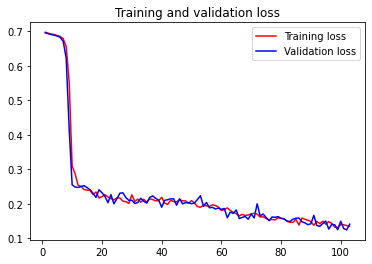

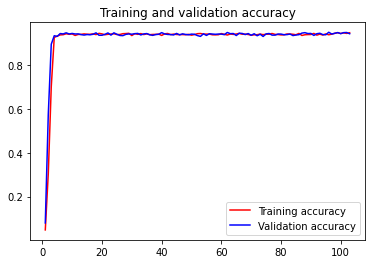

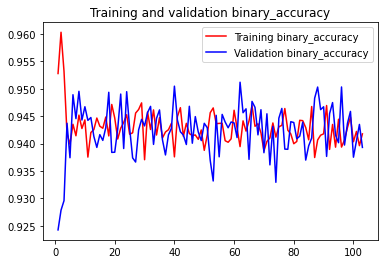

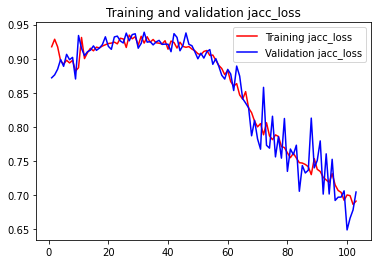

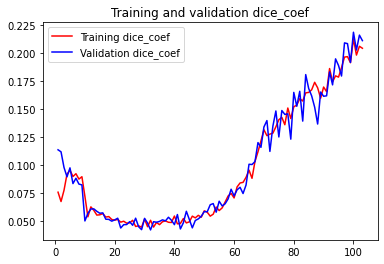

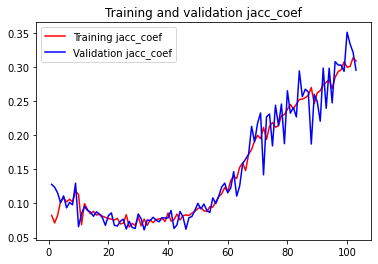

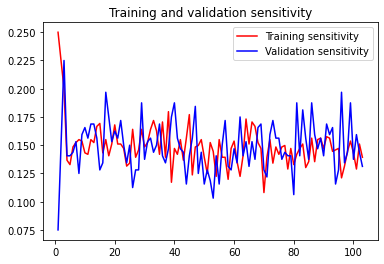

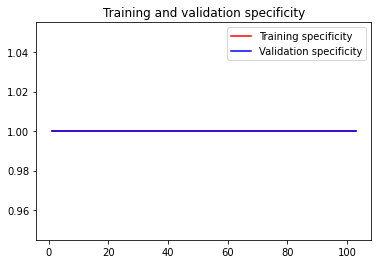

Min/Max Validation val_loss 0.12473151832818985 0.6956068873405457
Min/Max Validation val_accuracy 0.07932617515325546 0.952200710773468
Min/Max Validation val_binary_accuracy 0.9242480397224426 0.9511997103691101
Min/Max Validation val_jacc_loss 0.6493391394615173 0.9388496279716492
Min/Max Validation val_dice_coef 0.04214955121278763 0.21847489476203918
Min/Max Validation val_jacc_coef 0.061150290071964264 0.35066089034080505
Min/Max Validation val_sensitivity 0.07500000298023224 0.22499999403953552
Min/Max Validation val_specificity 1.0 1.0


In [19]:
history = load_multiple('loss rgb.json')
plot_graphs(history)

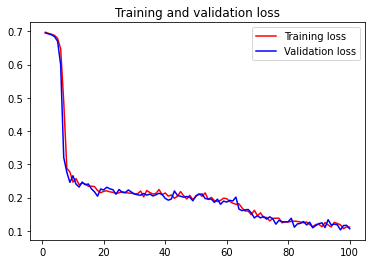

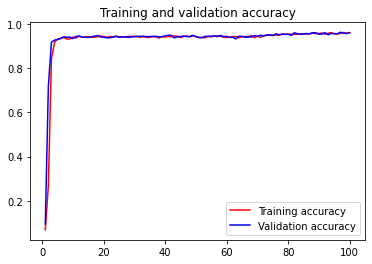

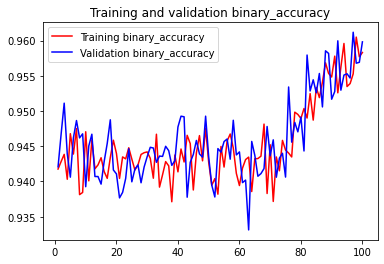

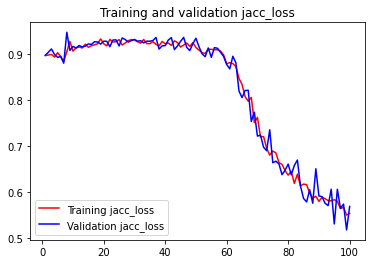

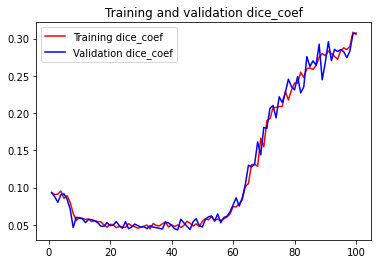

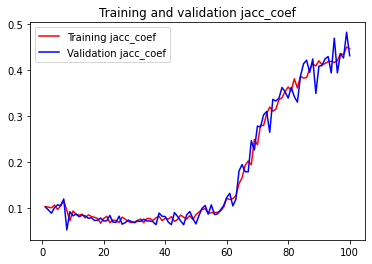

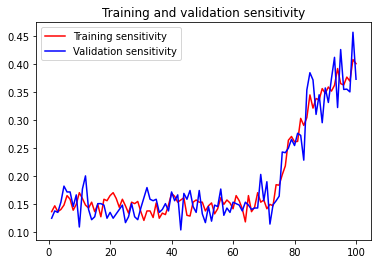

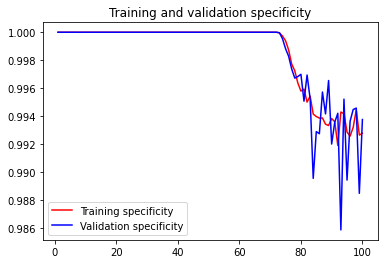

Min/Max Validation val_loss 0.10259578377008438 0.6954798102378845
Min/Max Validation val_accuracy 0.09512969851493835 0.9631934762001038
Min/Max Validation val_binary_accuracy 0.9331287741661072 0.9611724615097046
Min/Max Validation val_jacc_loss 0.5174382328987122 0.947154700756073
Min/Max Validation val_dice_coef 0.0431661419570446 0.3071976900100708
Min/Max Validation val_jacc_coef 0.05284528806805611 0.48256179690361023
Min/Max Validation val_sensitivity 0.1041666641831398 0.45670565962791443
Min/Max Validation val_specificity 0.9858644604682922 1.0


In [20]:
history = load_multiple('loss nir.json')
plot_graphs(history)